In [1]:
import altair as alt
import pandas as pd

In [2]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

CPU times: user 28.1 ms, sys: 64 µs, total: 28.2 ms
Wall time: 27.9 ms


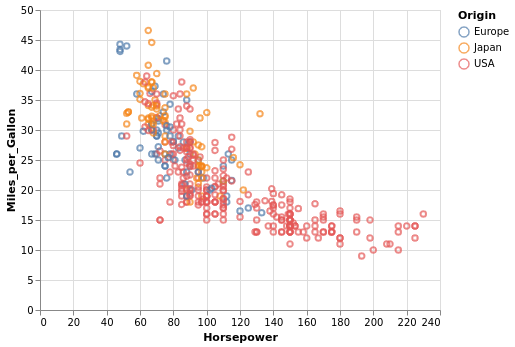

In [3]:
df = pd.read_json('cars.json')

%time alt.Chart(df).mark_point().encode(x='Horsepower', y='Miles_per_Gallon', color='Origin',)

In [4]:
import ipytablewidgets
chart = alt.Chart(df).mark_point().encode(
    x='Horsepower', 
    y='Miles_per_Gallon',
    color='Origin',
)

In [5]:
from vega.altair import stream
from vega.widget import VegaWidget

alt.data_transformers.enable('streaming')
from pprint import pprint
pprint(chart.to_dict())

{'$schema': 'https://vega.github.io/schema/vega-lite/v4.17.0.json',
 'config': {'view': {'continuousHeight': 300, 'continuousWidth': 400}},
 'data': {'name': 'data'},
 'encoding': {'color': {'field': 'Origin', 'type': 'nominal'},
              'x': {'field': 'Horsepower', 'type': 'quantitative'},
              'y': {'field': 'Miles_per_Gallon', 'type': 'quantitative'}},
 'mark': 'point'}


In [6]:
widget = VegaWidget(spec=chart.to_dict())
display(widget)
%time widget.update('data', insert=df)

VegaWidget()

CPU times: user 3.2 ms, sys: 0 ns, total: 3.2 ms
Wall time: 2.75 ms


In [7]:
stream(chart)

VegaWidget()

In [8]:

from vega_datasets import data

source = data.wheat()
threshold = pd.DataFrame([{"threshold": 90}])

bars = alt.Chart(source).mark_bar().encode(
    x="year:O",
    y="wheat:Q",
)

highlight = alt.Chart(source).mark_bar(color="#e45755").encode(
    x='year:O',
    y='baseline:Q',
    y2='wheat:Q'
).transform_filter(
    alt.datum.wheat > 90
).transform_calculate("baseline", "90")

rule = alt.Chart(threshold).mark_rule().encode(
    y='threshold:Q'
)

chart = (bars + highlight + rule).properties(width=600)


In [9]:
with alt.data_transformers.enable('streaming', context={}):
    pprint(chart.to_dict())

{'$schema': 'https://vega.github.io/schema/vega-lite/v4.17.0.json',
 'config': {'view': {'continuousHeight': 300, 'continuousWidth': 400}},
 'data': {'name': 'data'},
 'layer': [{'encoding': {'x': {'field': 'year', 'type': 'ordinal'},
                         'y': {'field': 'wheat', 'type': 'quantitative'}},
            'mark': 'bar'},
           {'encoding': {'x': {'field': 'year', 'type': 'ordinal'},
                         'y': {'field': 'baseline', 'type': 'quantitative'},
                         'y2': {'field': 'wheat'}},
            'mark': {'color': '#e45755', 'type': 'bar'},
            'transform': [{'filter': '(datum.wheat > 90)'},
                          {'as': 'baseline', 'calculate': '90'}]},
           {'data': {'name': 'data-2'},
            'encoding': {'y': {'field': 'threshold', 'type': 'quantitative'}},
            'mark': 'rule'}],
 'width': 600}


In [10]:
# The streaming API overrides the default transformer
alt.data_transformers.enable('default')

DataTransformerRegistry.enable('default')

In [11]:
stream(chart, debug=True)

to_streaming 139620272840816
to_streaming 139620272404320


VegaWidget()

In [12]:
# Do not stream the threshold table, inlining it is fine

stream(chart, exceptions=[threshold], debug=True)

to_streaming 139620272840816
to_streaming 139620272404320
Exception for 139620272404320


VegaWidget()

In [13]:
from vega.altair import stream_examples

stream_examples()
#from altair_examples import iter_examples, exec_example

#errors = []
#for example in iter_examples():
#    chart = exec_example(example)
#    if chart is None:
#        print('Error for', example['name'])
#        errors.append(example['name'])
#    stream(chart)
#errors

Example #1: wheat_wages


VegaWidget()

Time: 0.680358113 s
Example #2: seattle_weather_interactive


VegaWidget()

Time: 0.556579457 s
Example #3: selection_layer_bar_month


VegaWidget()

Time: 0.498052614 s
Example #4: parallel_coordinates


VegaWidget()

Time: 0.290701061 s
Example #5: top_k_with_others


VegaWidget()

Time: 0.352671336 s
Example #6: isotype


VegaWidget()

Time: 0.342986044 s
Example #7: table_bubble_plot_github


VegaWidget()

Time: 0.172481999 s
Example #8: area_chart_gradient


VegaWidget()

Time: 0.331455578 s
Example #9: bar_chart_horizontal


VegaWidget()

Time: 0.123228381 s
Example #10: histogram_responsive


VegaWidget()

Time: 0.261446291 s
Example #11: poly_fit_regression


VegaWidget()

Time: 0.716455413 s
Example #12: normalized_stacked_area_chart


VegaWidget()

Time: 0.150310189 s
Example #13: select_detail


VegaWidget()

Time: 0.4284987 s
Example #14: world_projections


VegaWidget()

Time: 0.230774951 s
Example #15: top_k_items


VegaWidget()

Time: 0.400099902 s
Example #16: bump_chart


VegaWidget()

Time: 0.361149534 s
Example #17: airports_count


VegaWidget()

Time: 0.389872695 s
Example #18: interactive_cross_highlight


VegaWidget()

Time: 0.584657993 s
Example #19: scatter_with_layered_histogram


VegaWidget()

Time: 0.454160683 s
Example #20: interactive_layered_crossfilter


VegaWidget()

Time: 0.460670354 s
Example #21: layered_histogram


VegaWidget()

Time: 0.225056299 s
Example #22: multifeature_scatter_plot


VegaWidget()

Time: 0.171227888 s
Example #23: choropleth


VegaWidget()

Time: 0.224123923 s
Example #24: ridgeline_plot


VegaWidget()

Time: 0.636590829 s
Example #25: wind_vector_map


VegaWidget()

Time: 0.219856499 s
Example #26: scatter_tooltips


VegaWidget()

Time: 0.286020747 s
Example #27: stacked_bar_chart_sorted_segments


VegaWidget()

Time: 0.183976421 s
Example #28: simple_scatter_with_errorbars


VegaWidget()

Time: 0.316664478 s
Example #29: sorted_error_bars_with_ci


VegaWidget()

Time: 0.349731053 s
Example #30: bar_chart_with_mean_line


VegaWidget()

Time: 0.22644031 s
Example #31: line_chart_with_cumsum


VegaWidget()

Time: 0.259377142 s
Example #32: horizontal_stacked_bar_chart


VegaWidget()

Time: 0.167476178 s
Example #33: scatter_href


VegaWidget()

Time: 0.225142177 s
Example #34: errorbars_with_std


VegaWidget()

Time: 0.263193207 s
Example #35: line_chart_with_generator


VegaWidget()

Time: 0.204897016 s
Example #36: filled_step_chart


VegaWidget()

Time: 0.253818028 s
Example #37: hexbins


VegaWidget()

Time: 0.333126294 s
Example #38: boxplot


VegaWidget()

Time: 0.105839978 s
Example #39: simple_histogram


VegaWidget()

Time: 0.158043316 s
Example #40: us_employment


VegaWidget()

Time: 0.605189814 s
Example #41: co2_concentration


VegaWidget()

Time: 0.979219867 s
Example #42: gantt_chart


VegaWidget()

Time: 0.135823394 s
Example #43: multiple_interactions


VegaWidget()

Time: 0.910447022 s
Example #44: anscombe_plot


VegaWidget()

Time: 0.143552916 s
Example #45: us_population_pyramid_over_time


VegaWidget()

Time: 0.577886847 s
Example #46: isotype_grid


VegaWidget()

Time: 0.195594614 s
Example #47: slope_graph


VegaWidget()

Time: 0.151478779 s
Example #48: london_tube


VegaWidget()

Time: 0.390225002 s
Example #49: top_k_letters


VegaWidget()

Time: 0.34792304 s
Example #50: candlestick_chart


VegaWidget()

Time: 0.55481143 s
Example #51: grouped_bar_chart_horizontal


VegaWidget()

Time: 0.161653019 s
Example #52: normalized_stacked_bar_chart


VegaWidget()

Time: 0.157700219 s
Example #53: simple_bar_chart


VegaWidget()

Time: 0.125603073 s
Example #54: scatter_with_histogram


VegaWidget()

Time: 0.458574654 s
Example #55: scatter_qq


VegaWidget()

Time: 0.29568099 s
Example #56: one_dot_per_zipcode


VegaWidget()

Time: 0.275673156 s
Example #57: scatter_with_rolling_mean


VegaWidget()

Time: 0.362694397 s
Example #58: dot_dash_plot


VegaWidget()

Time: 0.470064622 s
Example #59: bar_rounded


VegaWidget()

Time: 0.183284715 s
Example #60: bar_and_line_with_dual_axis


VegaWidget()

Time: 0.198755044 s
Example #61: bar_chart_with_highlighted_bar


VegaWidget()

Time: 0.329163594 s
Example #62: scatter_marginal_hist


VegaWidget()

Time: 0.311302691 s
Example #63: bar_chart_trellis_compact


VegaWidget()

Time: 0.194095482 s
Example #64: cumulative_count_chart


VegaWidget()

Time: 0.249309064 s
Example #65: us_incomebrackets_by_state_facet


VegaWidget()

Time: 0.287698845 s
Example #66: bubble_plot


VegaWidget()

Time: 0.148607969 s
Example #67: pacman_chart


VegaWidget()

Time: 0.188777376 s
Example #68: scatter_with_labels


VegaWidget()

Time: 0.225210325 s
Example #69: grouped_bar_chart


VegaWidget()

Time: 0.159055971 s
Example #70: multiline_tooltip


VegaWidget()

Time: 0.686992859 s
Example #71: line_percent


VegaWidget()

Time: 0.251915598 s
Example #72: window_rank


VegaWidget()

Time: 0.289558776 s
Example #73: airports


VegaWidget()

Time: 0.301790684 s
Example #74: strip_plot


VegaWidget()

Time: 0.129555055 s
Example #75: line_with_log_scale


VegaWidget()

Time: 0.139208078 s
Example #76: bar_with_rolling_mean


VegaWidget()

Time: 0.320643183 s
Example #77: image_tooltip


VegaWidget()

Time: 0.166172465 s
Example #78: radial_chart


VegaWidget()

Time: 0.275414959 s
Example #79: simple_heatmap


VegaWidget()

Time: 0.136215821 s
Example #80: bar_chart_sorted


VegaWidget()

Time: 0.166073972 s
Example #81: cumulative_wiki_donations


VegaWidget()

Time: 0.214775875 s
Example #82: density_stack


VegaWidget()

Time: 0.215412011 s
Example #83: trellis_histogram


VegaWidget()

Time: 0.145376833 s
Example #84: simple_line_chart


VegaWidget()

Time: 0.137307544 s
Example #85: stacked_bar_chart


VegaWidget()

Time: 0.181872567 s
Example #86: simple_stacked_area_chart


VegaWidget()

Time: 0.161241965 s
Example #87: line_chart_with_color_datum


VegaWidget()

Time: 0.321846368 s
Example #88: layer_line_color_rule


VegaWidget()

Time: 0.259933458 s
Example #89: selection_histogram


VegaWidget()

Time: 0.450152969 s
Example #90: pyramid


VegaWidget()

Time: 0.207343723 s
Example #91: us_state_capitals


VegaWidget()

Time: 0.617748515 s
Example #92: donut_chart


VegaWidget()

Time: 0.170915434 s
Example #93: trellis_area


VegaWidget()

Time: 0.164853496 s
Example #94: step_chart


VegaWidget()

Time: 0.275330488 s
Example #95: isotype_emoji


VegaWidget()

Time: 0.357150996 s
Example #96: grouped_bar_chart_with_error_bars


VegaWidget()

Time: 0.2949128 s
Example #97: line_chart_with_datum


VegaWidget()

Time: 0.361275065 s
Example #98: scatter_linked_brush


VegaWidget()

Time: 0.404832879 s
Example #99: scatter_with_minimap


VegaWidget()

Time: 0.360085145 s
Example #100: layered_bar_chart


VegaWidget()

Time: 0.18221601 s
Example #101: airport_connections


VegaWidget()

Time: 1.010984426 s
Example #102: iowa_electricity


VegaWidget()

Time: 0.172567001 s
Example #103: streamgraph


VegaWidget()

Time: 0.287344358 s
Example #104: pie_chart


VegaWidget()

Time: 0.142876806 s
Example #105: trellis_scatter_plot


VegaWidget()

Time: 0.140037887 s
Example #106: diverging_stacked_bar_chart


VegaWidget()

Time: 0.189914637 s
Example #107: errorbars_with_ci


VegaWidget()

Time: 0.236859524 s
Example #108: beckers_barley_trellis_plot


VegaWidget()

Time: 0.267418186 s
Example #109: trellis_stacked_bar_chart


VegaWidget()

Time: 0.157332527 s
Example #110: beckers_barley_wrapped_facet


VegaWidget()

Time: 0.174737815 s
Example #111: comet_chart


VegaWidget()

Time: 0.442605878 s
Example #112: layered_chart_bar_mark


VegaWidget()

Time: 0.207478734 s
Example #113: multi_series_line


VegaWidget()

Time: 0.163824418 s
Example #114: choropleth_repeat


VegaWidget()

Time: 0.262620309 s
Example #115: scatter_with_loess


VegaWidget()

Time: 0.397794719 s
Example #116: interactive_brush


VegaWidget()

Time: 0.259945704 s
Example #117: interactive_scatter_plot


VegaWidget()

Time: 0.213632352 s
Example #118: histogram_with_a_global_mean_overlay


VegaWidget()

Time: 0.253772231 s
Example #119: world_map


VegaWidget()

Time: 0.275955001 s
Example #120: trellis_area_sort_array


VegaWidget()

Time: 0.256447432 s
Example #121: stripplot


VegaWidget()

Time: 0.277304012 s
Example #122: bar_chart_with_labels


VegaWidget()

Time: 0.241604171 s
Example #123: scatter_matrix


VegaWidget()

Time: 0.232698394 s
Example #124: weather_heatmap


VegaWidget()

Time: 0.287262174 s
Example #125: horizon_graph


VegaWidget()

Time: 0.275191143 s
Example #126: pie_chart_with_labels


VegaWidget()

Time: 0.237474227 s
Example #127: gapminder_bubble_plot


VegaWidget()

Time: 0.189512232 s
Example #128: violin_plot


VegaWidget()

Time: 0.332986462 s
Example #129: connected_scatterplot


VegaWidget()

Time: 0.149004437 s
Example #130: stem_and_leaf


VegaWidget()

Time: 0.220497561 s
Example #131: binned_scatterplot


VegaWidget()

Time: 0.198815225 s
Example #132: us_population_over_time_facet


VegaWidget()

Time: 0.151059536 s
Example #133: select_mark_area


VegaWidget()

Time: 0.464068248 s
Example #134: ranged_dot_plot


VegaWidget()

Time: 0.438842107 s
Example #135: interval_selection


VegaWidget()

Time: 0.203617689 s
Example #136: falkensee


VegaWidget()

Time: 0.331522204 s
Example #137: line_chart_with_points


VegaWidget()

Time: 0.147199782 s
Example #138: interactive_legend


VegaWidget()

Time: 0.36224075 s
Example #139: natural_disasters


VegaWidget()

Time: 0.312049237 s
Example #140: wilkinson-dot-plot


VegaWidget()

Time: 0.317361745 s
Example #141: multiline_highlight


VegaWidget()

Time: 0.378118967 s
Example #142: line_with_ci


VegaWidget()

Time: 0.226235901 s
Example #143: binned_heatmap


VegaWidget()

Time: 0.185959018 s
Example #144: bar_chart_with_highlighted_segment


VegaWidget()

Time: 0.399628673 s
Example #145: density_facet


VegaWidget()

Time: 0.200995294 s
Example #146: multiple_marks


VegaWidget()

Time: 0.184783156 s
Example #147: layered_area_chart


VegaWidget()

Time: 0.210337005 s
Example #148: layered_heatmap_text


VegaWidget()

Time: 0.610766439 s
Example #149: percentage_of_total


VegaWidget()

Time: 0.209884755 s
Example #150: layered_chart_with_dual_axis


VegaWidget()

Time: 0.358040344 s
Example #151: scatter_linked_table


VegaWidget()

Time: 0.836201189 s
Example #152: stacked_bar_chart_with_text


VegaWidget()

Time: 0.283290055 s
Example #153: trail_marker


VegaWidget()

Time: 0.139270962 s
Example #154: bar_chart_with_negatives


VegaWidget()

Time: 0.326341281 s
Example #155: us_population_over_time


VegaWidget()

Time: 0.347008271 s
Example #156: normed_parallel_coordinates


VegaWidget()

Time: 0.327486789 s
Total number of examples: 156, Sucess: 156, Error(s): 0


{}